def table_of_contents():
    print('1. Introduction')
    print('2. Importacion de librerias')
    print('3. Lectura de datos')
    print('4. Anilisis por columna')
    print('5. Busqueda y analisis de datos nulos')
    print('5. Reemplazamiento de datos nulos y atipicos')
    print('6. Creacion de nuevas columnas')
    print('7. Visualizacion de datos')
    print('8. Analisis mediante pivot_table')
    print('9. Creacion de nuevo dataset(probability)')
    print('10. Conclusiones')
    retund

In [196]:
table_of_contents()

SyntaxError: invalid syntax (3532914805.py, line 1)

Estudia los siguientes parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición.
Traza histogramas para cada uno de los parámetros.
Estudia cómo los valores atípicos afectan a la forma y legitimidad de los histogramas.
Determina los límites superiores de los valores atípicos, elimina dichos valores y almacénalos en un DataFrame apartado, y continúa tu trabajo con los datos filtrados.
Utiliza los datos filtrados para plantear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos).
Obtén conclusiones de cada histograma.
Estudia cuántos días los anuncios fueron mostrados (days_listed). Traza un histograma.
Calcula la media y la mediana. Describe la vida útil habitual de un anuncio.
Determina cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
Analiza el número de anuncios y el precio medio para cada tipo de vehículo.
Traza un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo.
Selecciona los dos tipos con un mayor número de anuncios.
¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), traza gráficos de caja y bigotes, y crea gráficos de dispersión para el resto.
Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.


### Vamos a estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.


### Descripción de los datos
### El conjunto de datos contiene los siguientes datos:
### price
### model_year
### model
### condition
### cylinders
### fuel — gasolina, diesel, etc.
### odometer — el millaje del vehículo cuando el anuncio fue publicado
### transmission
### paint_color
### is_4wd — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
### date_posted — la fecha en la que el anuncio fue publicado
### days_listed — desde la publicación hasta que se elimina

## IMPORTACION DE LIBRERIAS

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random as random

## READ DATA

In [142]:
data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Vehicles/vehicles_us.csv')

In [143]:
data.head(100)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9995,2017.0,hyundai sonata,excellent,4.0,gas,105985.0,automatic,sedan,white,NaN,2018-05-02,18
96,24600,2013.0,ford mustang gt coupe 2d,good,8.0,gas,22474.0,other,coupe,white,NaN,2018-10-28,22
97,6500,2012.0,ford fusion se,excellent,6.0,gas,90000.0,automatic,sedan,grey,NaN,2018-09-20,94
98,3995,2008.0,subaru forester,excellent,4.0,gas,165000.0,automatic,SUV,white,1.0,2018-12-24,19


In [144]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Podemos observar con el metodo describe ya varios datos interesantes:
Observamos las columnas de tipo numerico:
    - Price: Donde ya podemos sacar la info de la media de precios de los automoviles que es de 12,132.46
    - Model Year: Observamos que la media de año es del 2009
    - DaysListed: Donde podemos ver ya que la media de dias de los automoviles anunciados es de 39.55476

Esta info nos puede ayudar en varias cosas:

1 - En establecer tramos y sustituir esos numeros por puntuaciones de acuerdo a los tramos.
2 - En sustituir los valores nulos por medias en caso que lo vayamos a realizar de esa manera.

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [146]:
data.shape

(51525, 13)

In [147]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

# Analisis de datos por columna

In [148]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [149]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [150]:
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [151]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [152]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [153]:
data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [154]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [155]:
data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [156]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [157]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [158]:
data['is_4wd']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
51520    NaN
51521    NaN
51522    NaN
51523    NaN
51524    NaN
Name: is_4wd, Length: 51525, dtype: float64

In [159]:
data['date_posted'].value_counts()

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [160]:
data['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
240      1
209      1
188      1
192      1
186      1
Name: days_listed, Length: 227, dtype: int64

# BUSQUEDA Y ANALISIS DE DATOS NULOS

In [161]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [162]:
data.corr()

/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_2379/1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_2379/827330270.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=1, linecolor='gray')


<AxesSubplot:>

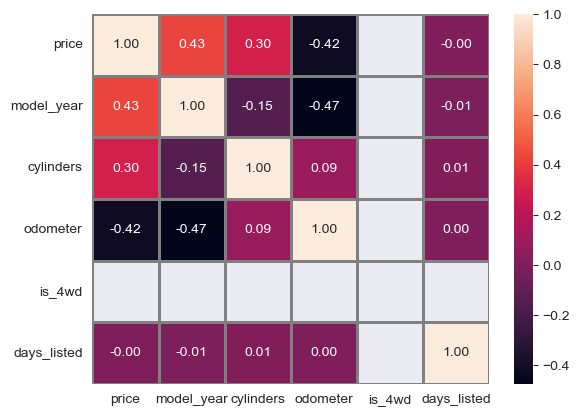

In [163]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=1, linecolor='gray')

El resultado indica que las variables numéricas no tienen una correlación muy alta entre ellas. Cuanto mas cerca de 1 o -1 esté el valor de correlación, más
correlación hay entre las variables

## REEMPLAZAMIENTO DE DATOS NULOS Y SUSTITUCION DE ATIPICOS

In [164]:
data['year'] = data['model_year'].fillna(random.randint(1904, 2019))
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].mean())
data['odometer'] = data['odometer'].fillna(data['odometer'].mean())
data['paint_color'] = data['paint_color'].fillna(data['paint_color'].mode()[0])
data['is_4wd'] = data['is_4wd'].fillna(0)
data['model'] = data['model'].str.split(' ').str[0]

Vamos a crear una funcion  para reemplazar los datos atipicos por la media o la mediana de la columna

In [165]:
def mean_std(data):
    mean = data.mean()
    std = data.std()
    return mean, std

In [166]:
mean_std(data)

/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_2379/3401043282.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_2379/3401043282.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


(price           12132.464920
 model_year       2009.750470
 cylinders           6.125235
 odometer       115553.461738
 is_4wd              0.496303
 days_listed        39.554760
 year             2009.838234
 dtype: float64,
 price          10040.803015
 model_year         6.282065
 cylinders          1.573327
 odometer       59902.205520
 is_4wd             0.499991
 days_listed       28.204270
 year               6.065836
 dtype: float64)

#Acabamos de leer todos los datos de cada una de las columnas.
#Podemos observar las columnas donde se encuentran los datos perdidos o nulos. [model_year, cylinders, odometer, paint_color y is_4wd]
#- Vemos 3619 datos perdidos y a su vez vemos que no tienen una preferencias por año asique vamos a reemplazar estos datos perdidos por
#años aleatorios en el rango comprendido que hemos observado en el datasets.
#- En la columna cylinders tambien observamos 5260 datos perdidos. En este caso vamos a reemplazar estos datos perdidos por la media de los datos de la columna cylinders
#- En la columna odometer tambien observamos 7892 datos perdidos. En este caso vamos a reemplazar estos datos perdidos por la media de los datos de la columna odometer.
#- Vamos a reemplazar estos datos perdidos de la columna paint_color por la moda de la columna que es la que mas se repite.
#- Mientras que en la columna is_4wd observamos que los valores perdidos de la columna indican que son booleanos, por lo que simplemente sustituimos los valores NaN por 0
#- Hemos sustituido los valores de la columna model por la primera parte del string de manera que tenemos la marca del vehiculo y podemos agrupar mas los valores de la columna.


## CREACION DE NUEVAS COLUMNAS

Creamos una columna en la que nos indique la fecha de venta. Una columna para el dia, mes y año en el que se vendio.

In [175]:
data['date_sold'] = pd.to_datetime(data['date_posted']) + pd.to_timedelta(data['days_listed'], unit='d')
data['year_sold'] = data['date_sold'].dt.year
data['month_sold'] = data['date_sold'].dt.month
data = data.rename(columns={'year': 'year_model'})

In [176]:
data['day_of_week'] = pd.to_datetime(data['date_sold']).dt.day_name()
data['day_of_week'] = data['day_of_week'].astype(str)

In [177]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_model,date_sold,year_sold,month_sold,day_of_week
0,9400,2011.0,bmw,good,6.0,gas,145000.000000,automatic,SUV,white,1.0,2018-06-23,19,2011.0,2018-07-12,2018,7,Thursday
1,25500,NaN,ford,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2011.0,2018-12-08,2018,12,Saturday
2,5500,2013.0,hyundai,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2013.0,2019-04-27,2019,4,Saturday
3,1500,2003.0,ford,fair,8.0,gas,115553.461738,automatic,pickup,white,0.0,2019-03-22,9,2003.0,2019-03-31,2019,3,Sunday
4,14900,2017.0,chrysler,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2017.0,2019-04-30,2019,4,Tuesday


## VISUALIZACION Y ANALISIS DE DATOS

Vamos a observar mas de cerca los valores de las columnas con graficos

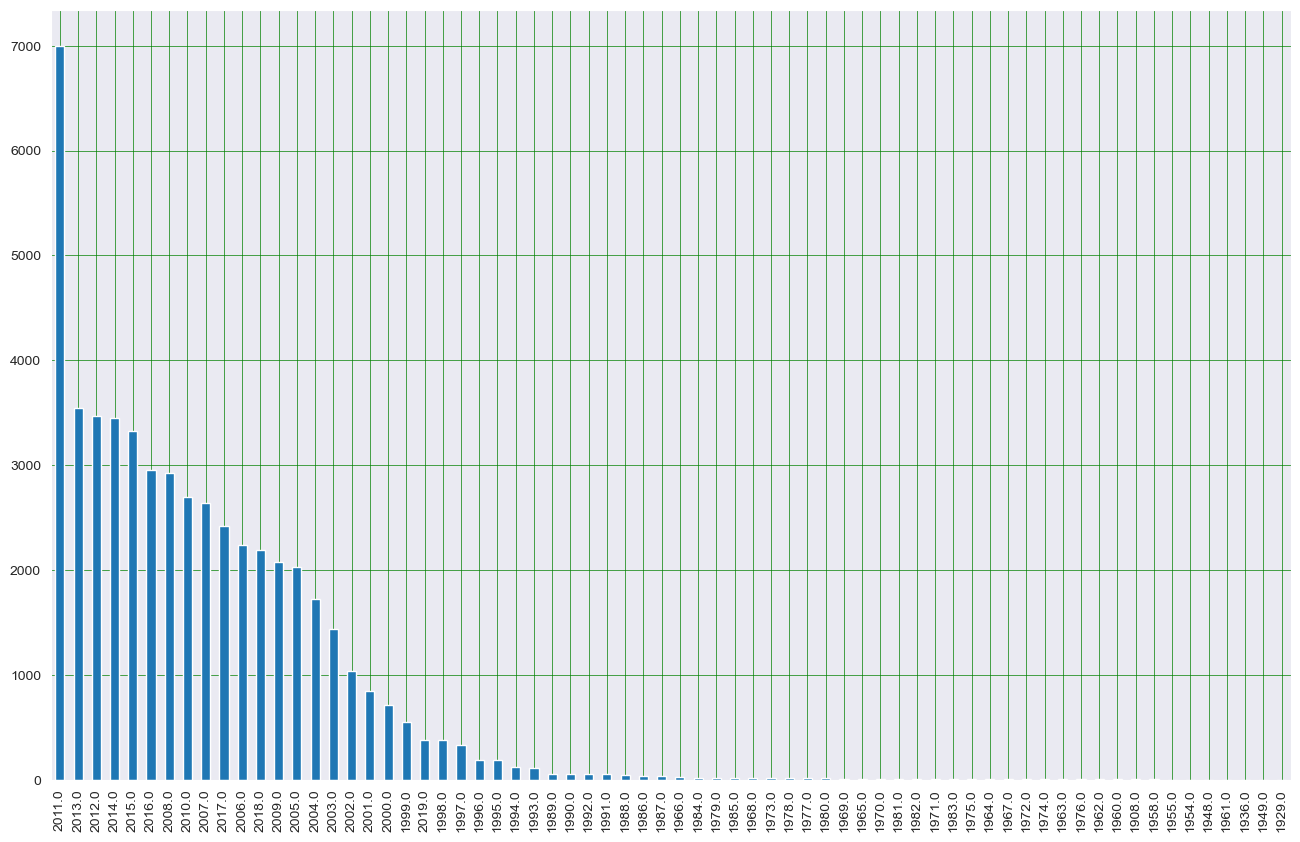

In [179]:
data['year_model'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Podemos observar mas de cerca los valores de los años de los vehiculos vendidos.
- Vemos una acumulacion de vehiculos vendidos comprendidos entre [2013, 2012, 2014, 2011, 2015, 2016, 2008, 2010 y 2007].

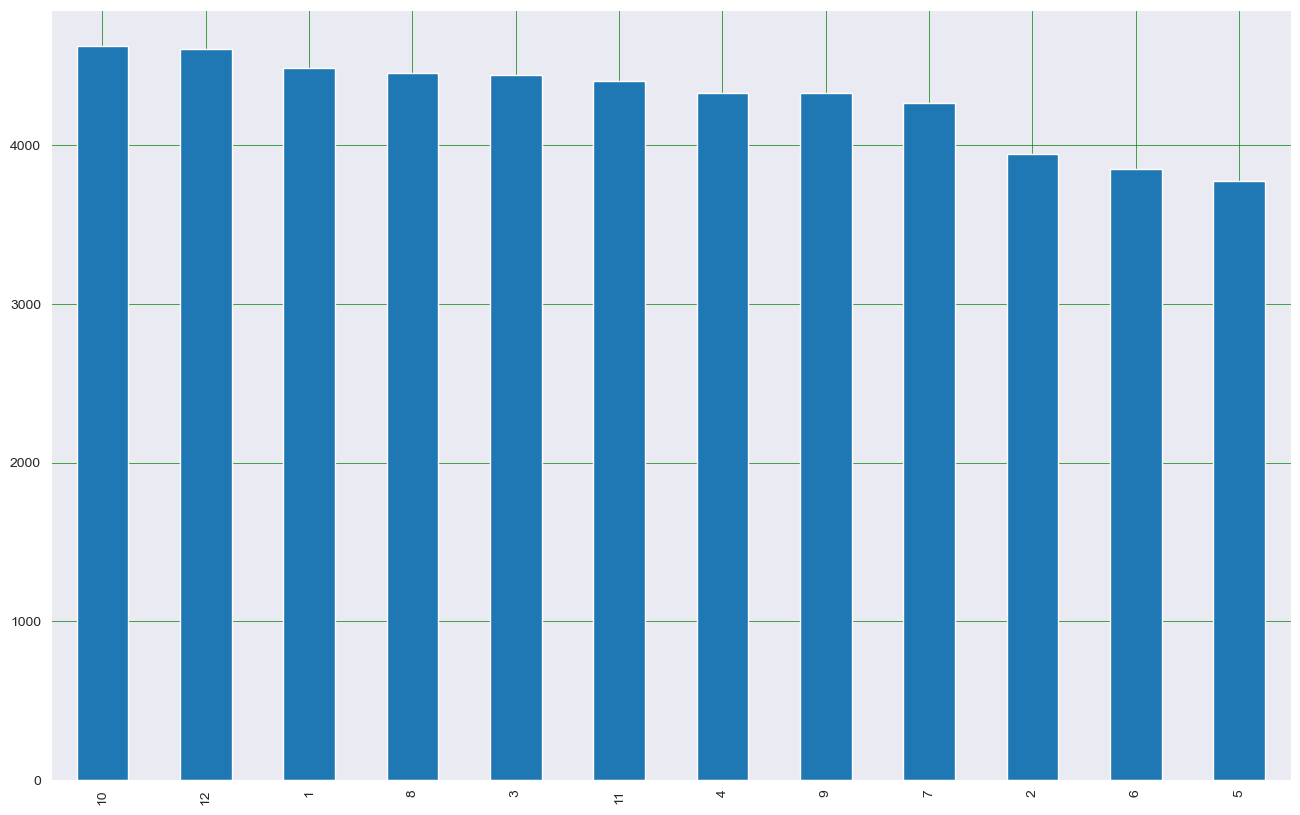

In [180]:
data['month_sold'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Podemos observar mas de cerca los valores de los meses en los que se vendieron mas vehiculos en el periodo de venta analizado y realmente no observamos una gran predominancia.

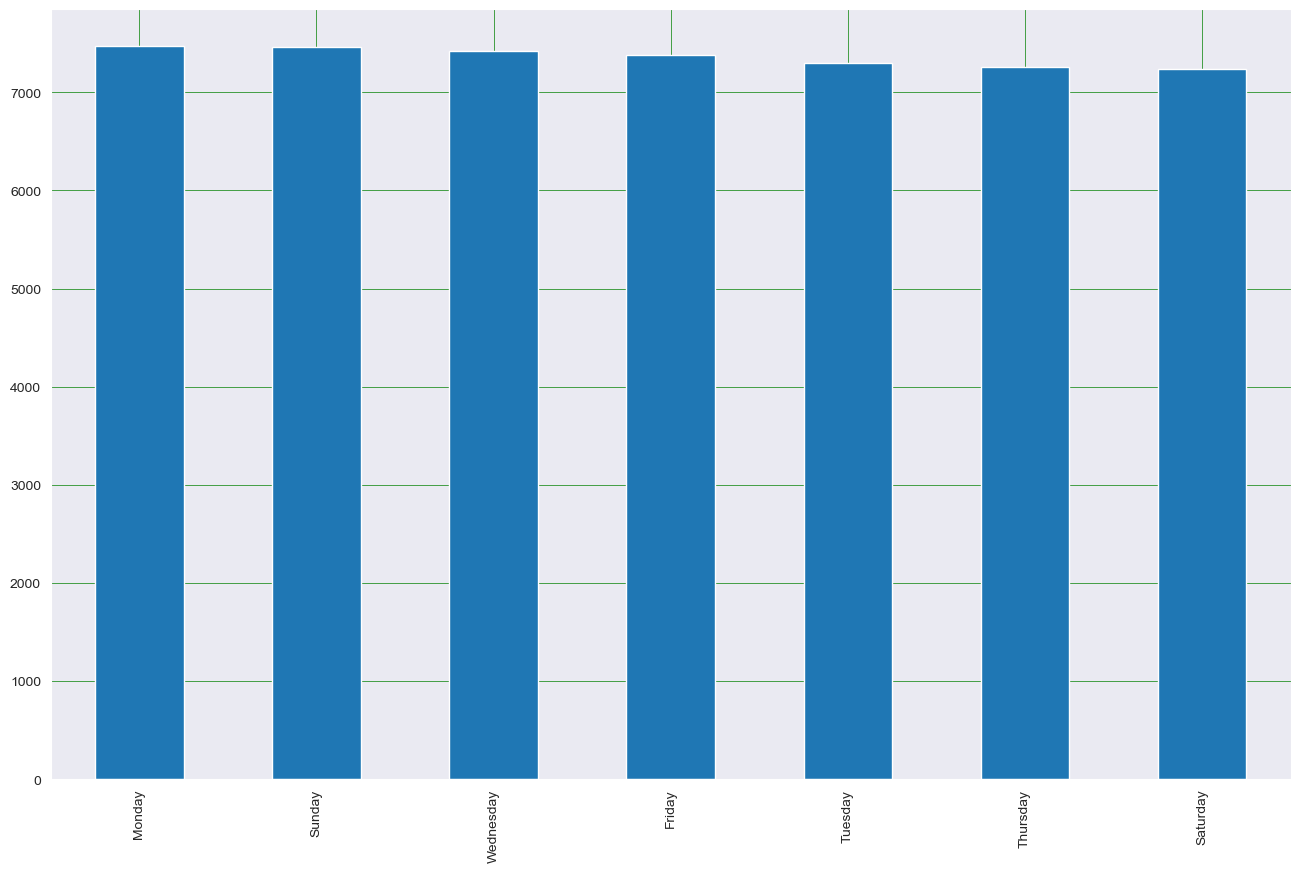

In [181]:
data['day_of_week'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Nos ocurre algo muy similar con los dias de la semana ya que no hay una gran predominancia de ninguno de ellos.

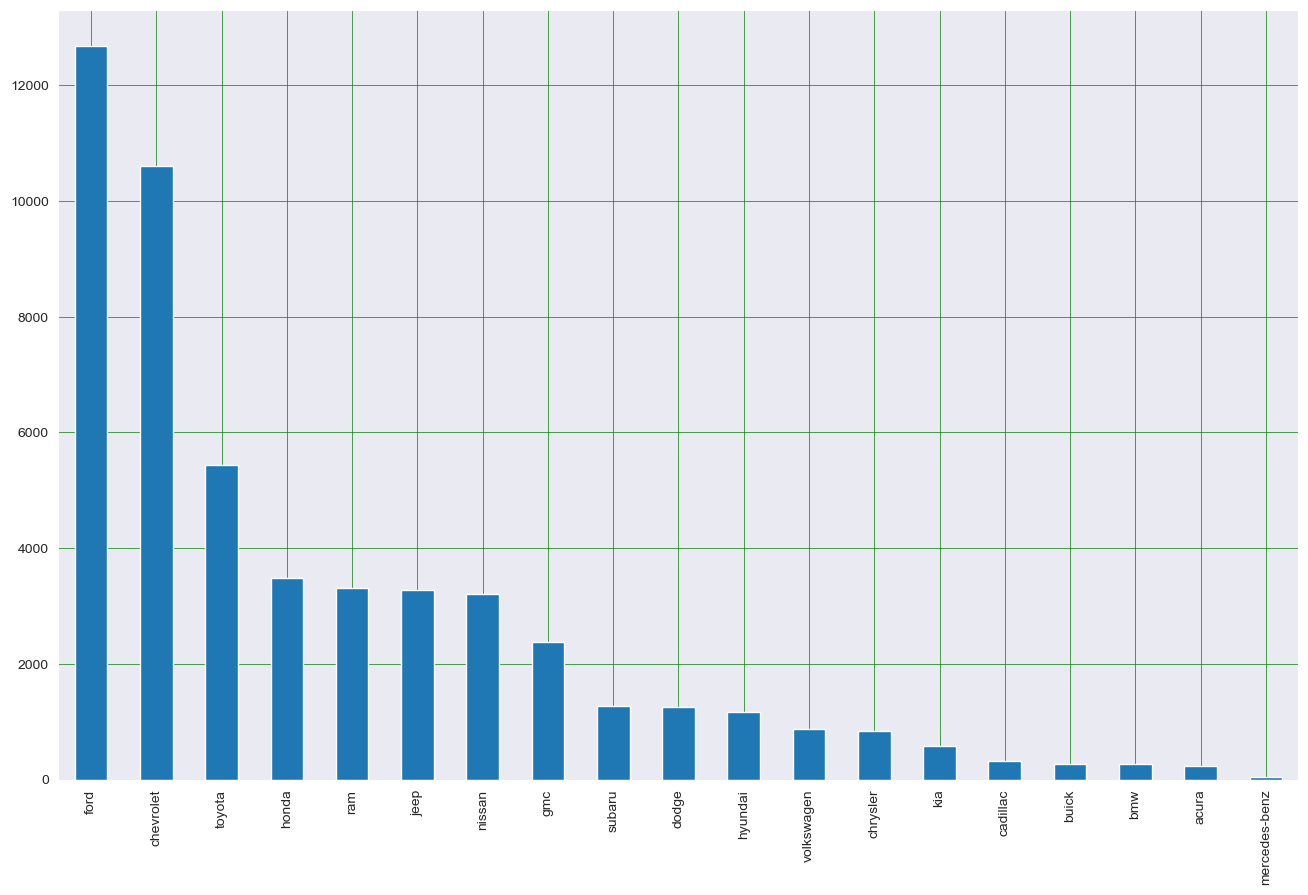

In [182]:
data['model'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

- Observamos 2 marcas claramente diferenciadas [ford y chevrolet]

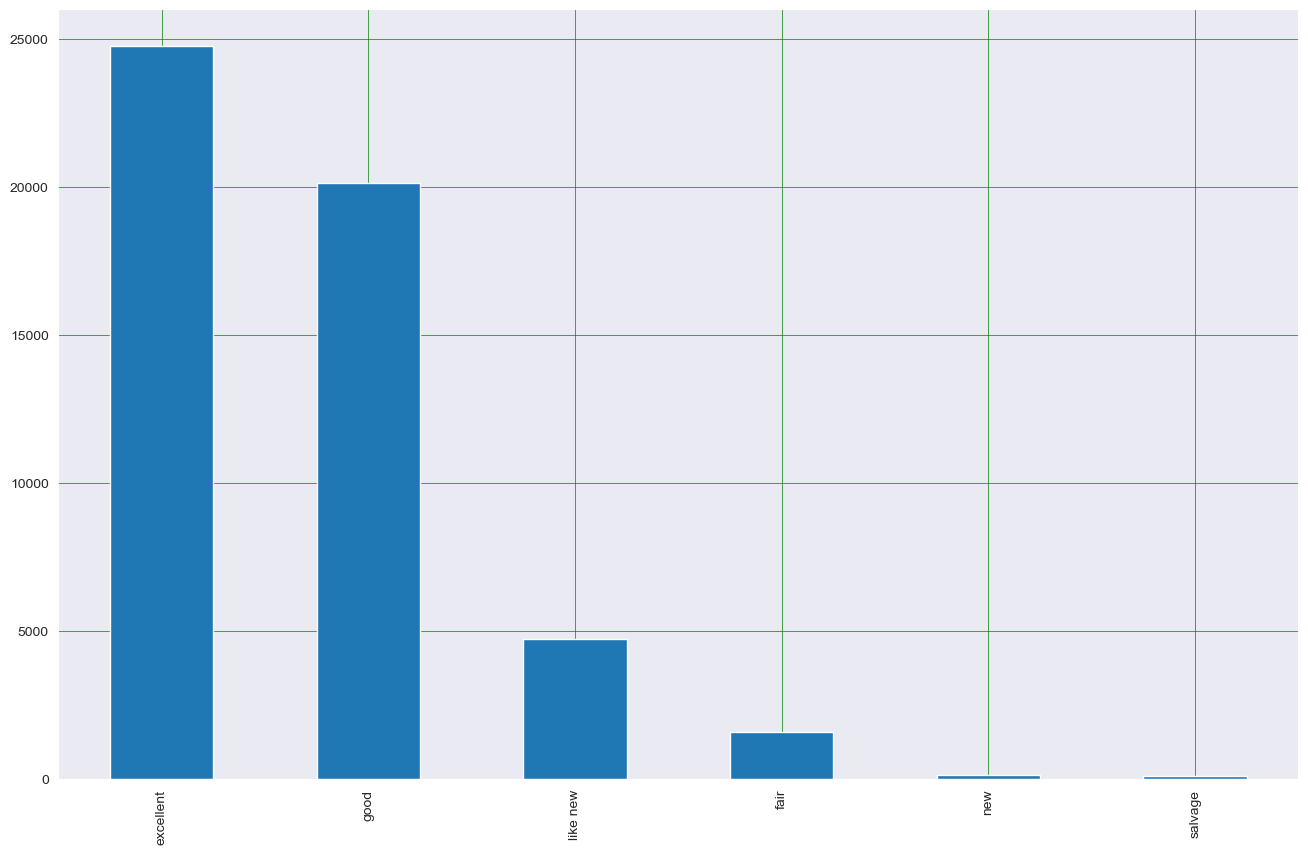

In [183]:
data['condition'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

De la columna condition podemos extraer la siguiente informacion:
- Los modelos con la condicion excellent y good son los mas vendidos con una clara diferencia.

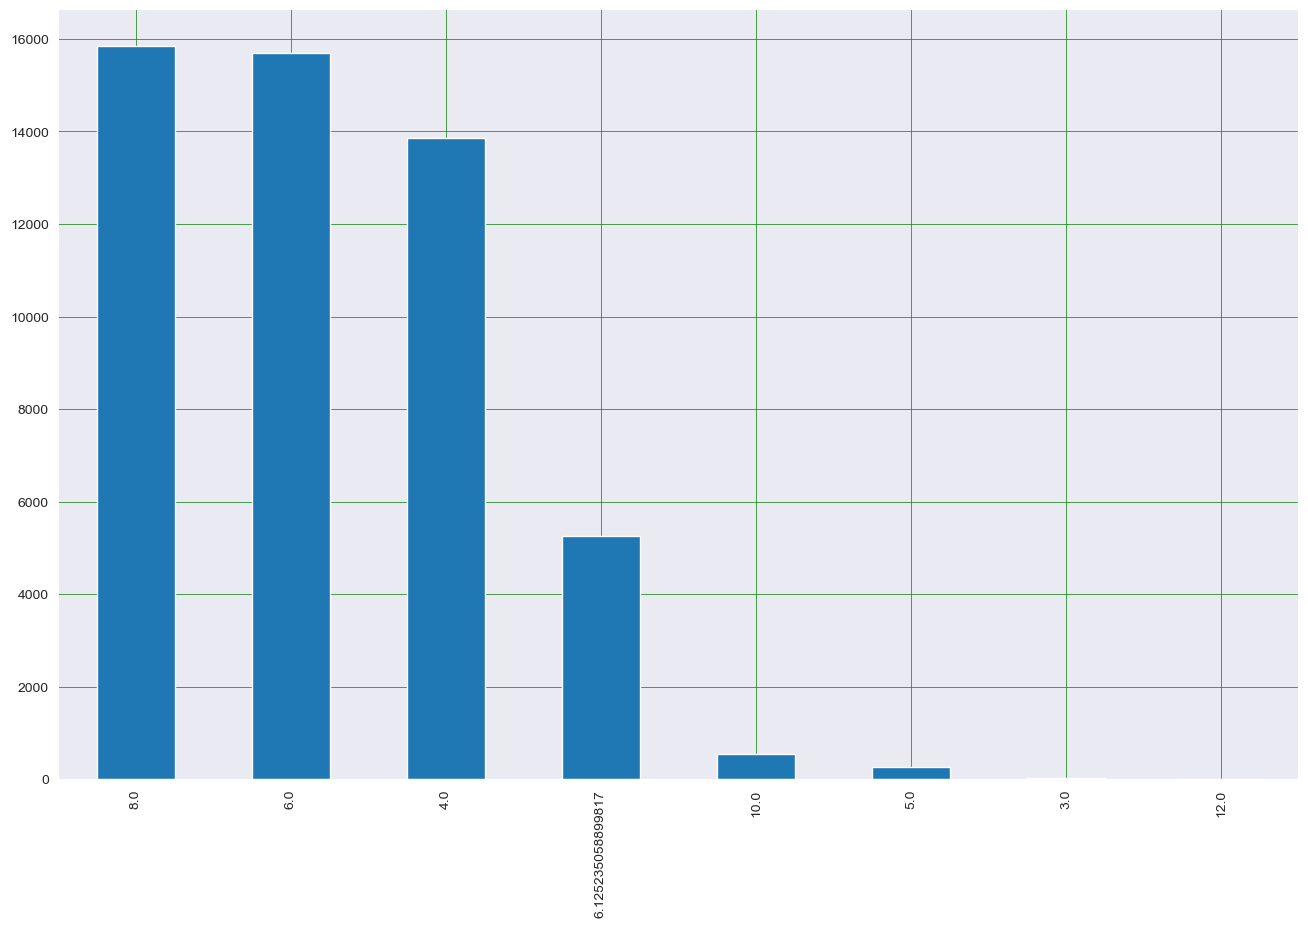

In [184]:
data['cylinders'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Cylinders:
- 8.0, 6.0 y 4.0 son los mas vendidos con una clara diferencia respectivamente.

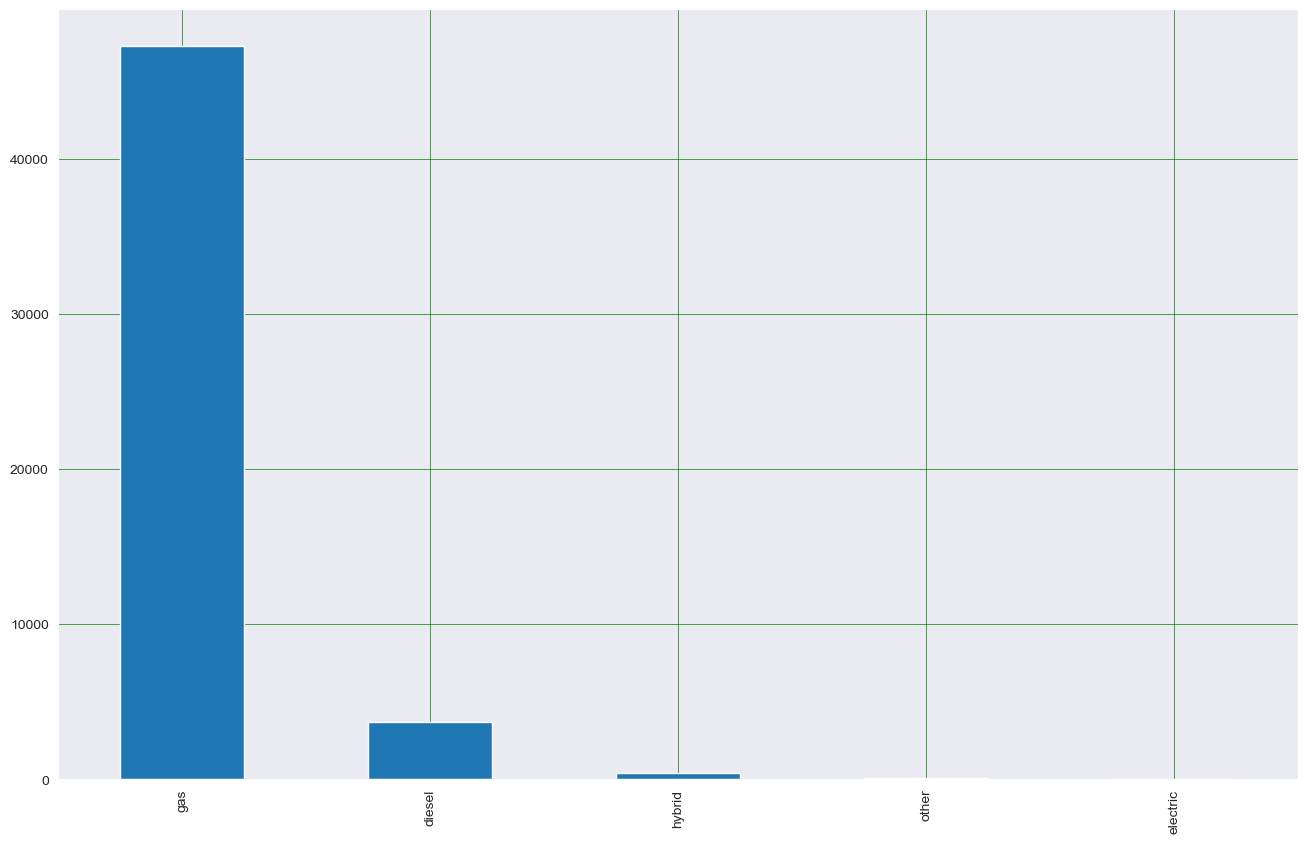

In [185]:
data['fuel'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Tenemos un claro monopolio del gas

Podemos observar que los datos estan muy dispersos, por lo que vamos a agruparlos en rangos de 10000 kilometros

In [186]:
data['odometer'] = pd.cut(data['odometer'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000, 720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000, 800000, 810000, 820000, 830000, 840000, 850000, 860000, 870000, 880000, 890000, 900000, 910000, 920000, 930000]
)

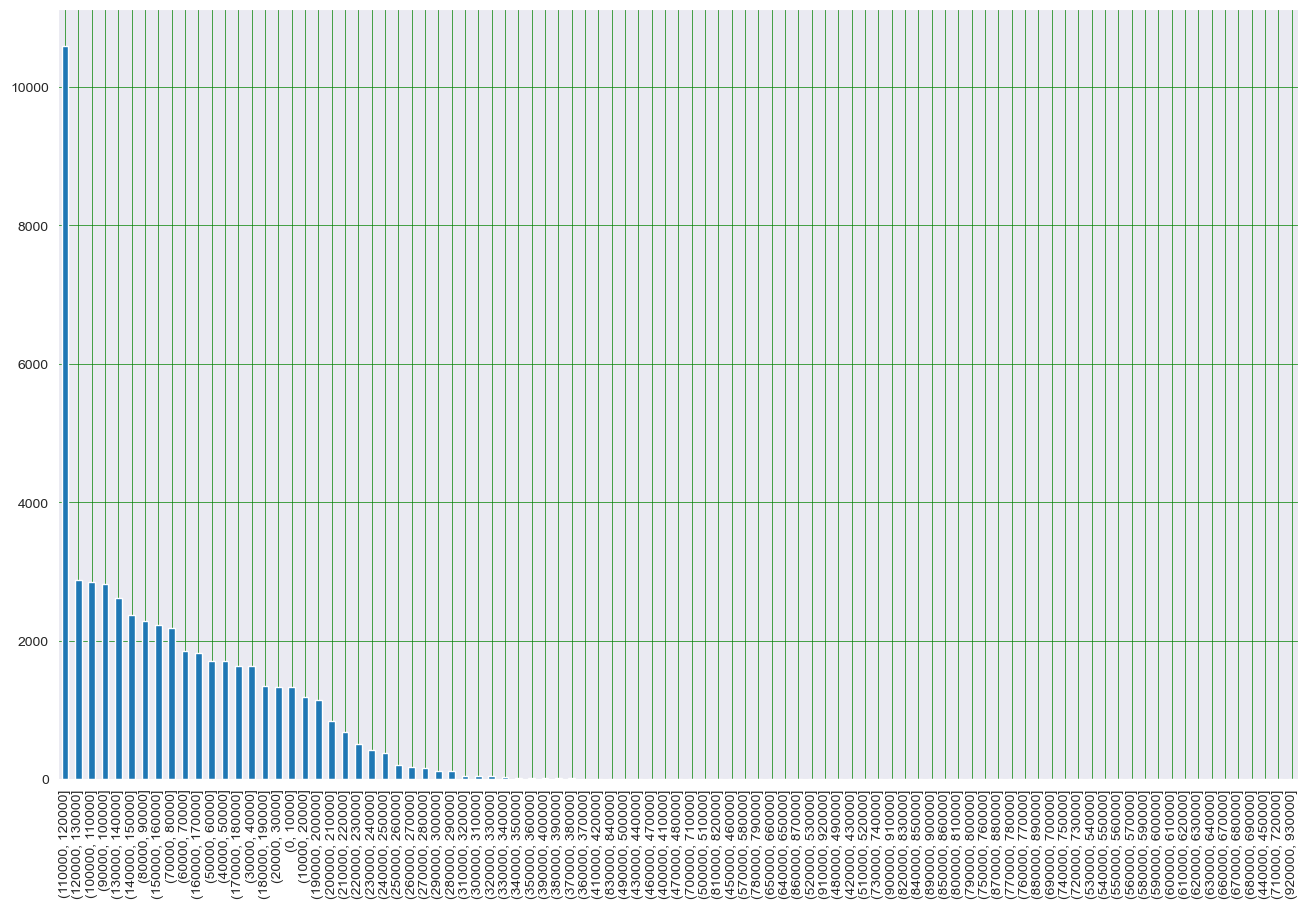

In [187]:
data['odometer'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Este se convierte en un grafico mas amplio debido a la cantidad de opciones que tenemos que analizar pero observamos claramente como aquellos vehiculos con 110,000 y 120,000 km son los mas adquiridos por los clientes.

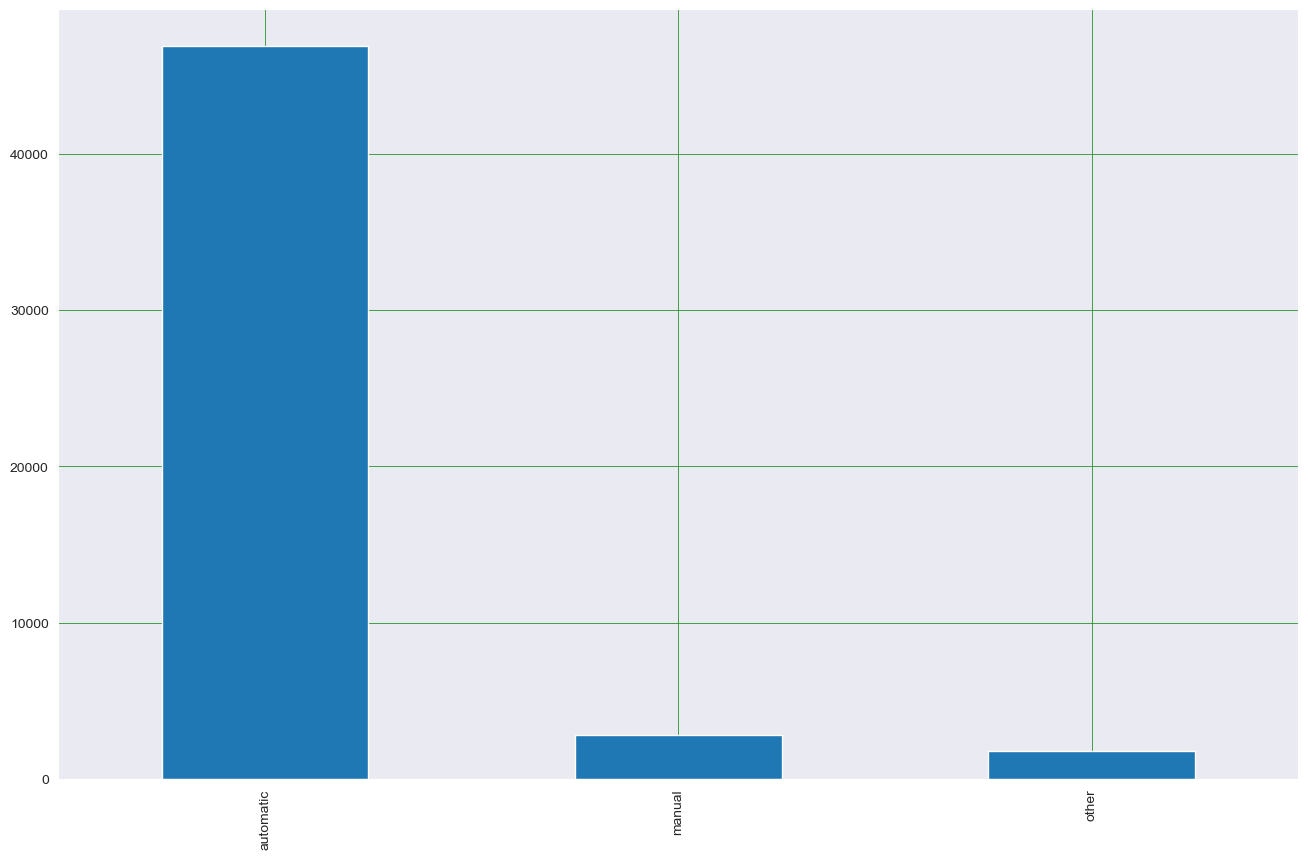

In [188]:
data['transmission'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Volvemos a tener una clara predileccion por una las opciones en este caso los modelos automaticos.

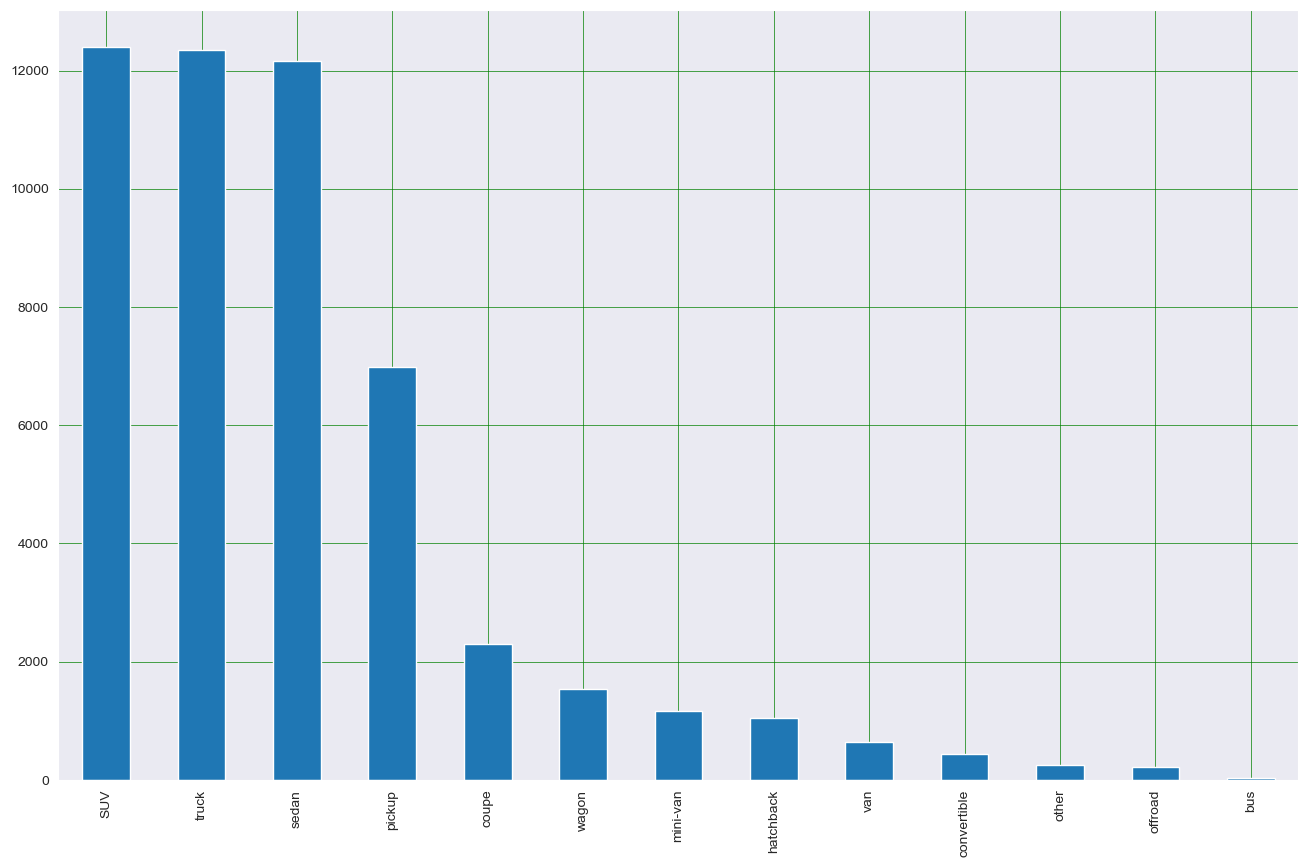

In [189]:
data['type'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Podemos observar las principales tipos de vehiculos que se venden en el mercado [SUV, Truck, Sedan y Pickup]

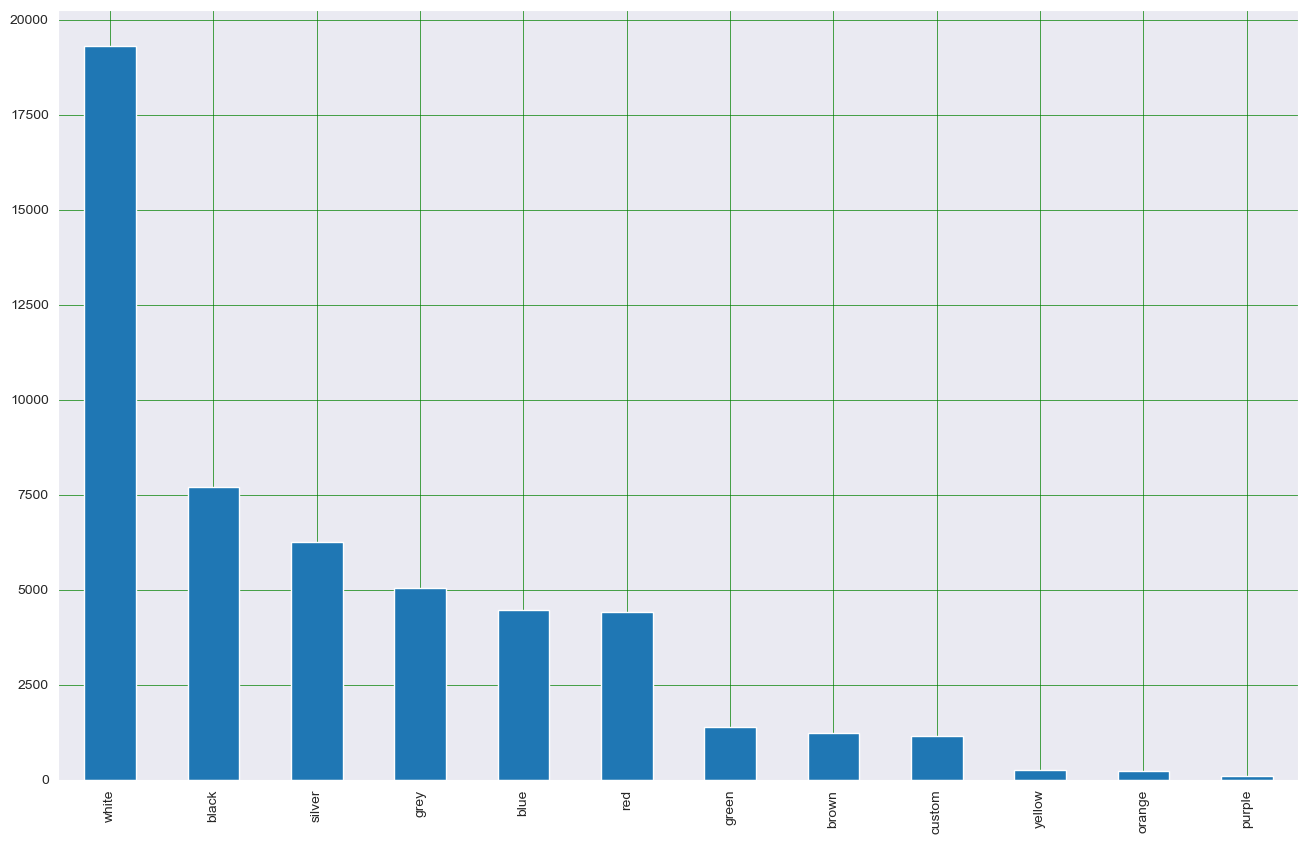

In [190]:
data['paint_color'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

De la columna colores sacamos las siguientes conclusiones:
- Vemos como white tiene la mayor predominancia al a ver sustituido los valores nulos
- Black y silver son los colores mayoritarios despues de White

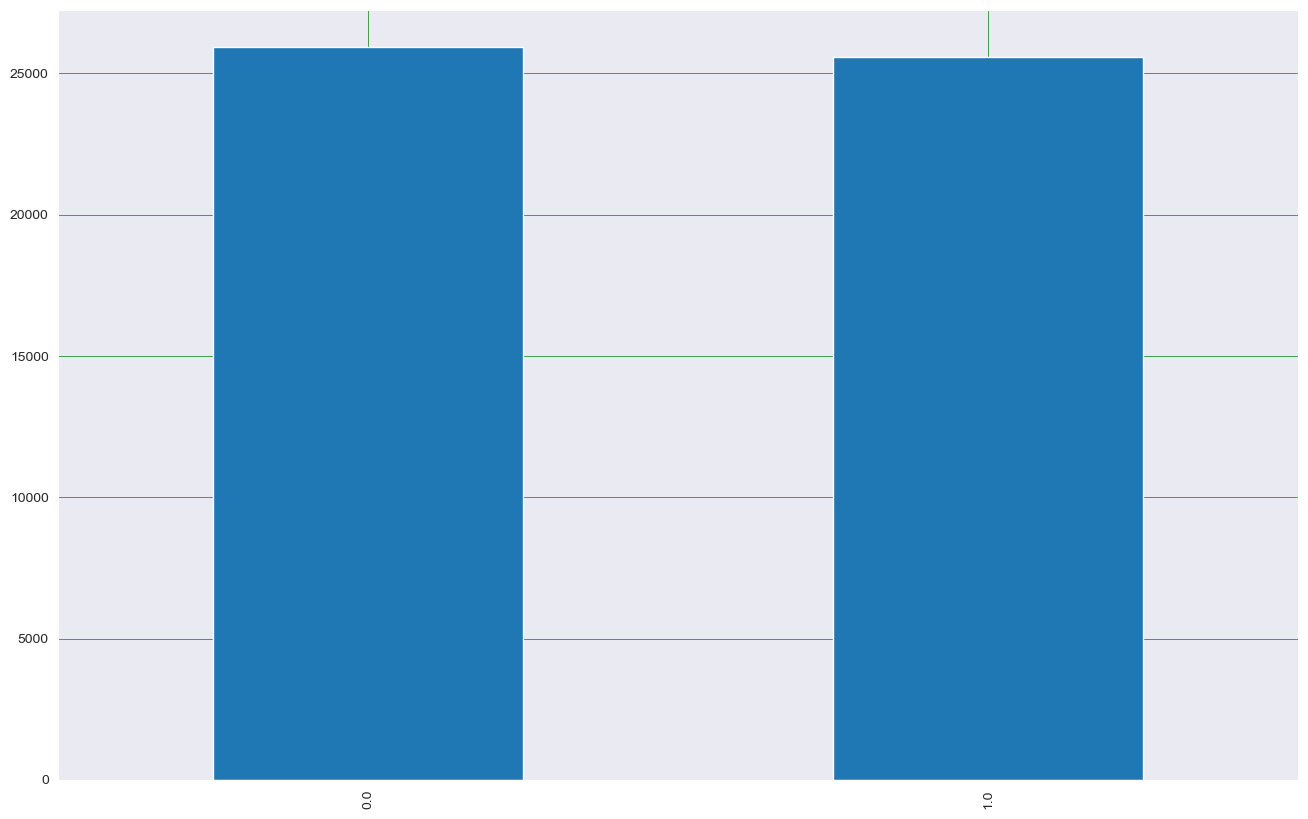

In [191]:
data['is_4wd'].value_counts().plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Vamos a eliminar la columna model_year y date_sold ya que tenemos la misma informacion en otras columnas que esta repetida.

In [192]:
data = data.drop(['model_year'], axis=1)
data = data.drop(['date_sold'], axis=1)

Tenemos los siguientes nuevos datos:
- Ahora tenemos el año de venta de cada automovil
- Tenemos tambien los meses de venta de cada automovil

# ANALISIS DE DATOS MEDIANTE PIVOT TABLE

Text(0.5, 1.0, 'Vehicles sold by year and month')

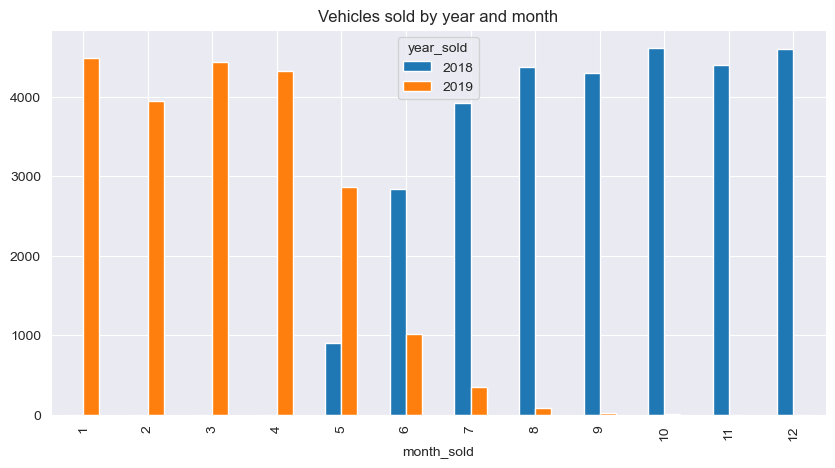

In [193]:
data.pivot_table(index='month_sold', columns='year_sold', values='price', aggfunc='count').plot(kind='bar', figsize=(10,5))
plt.title('Vehicles sold by year and month')

Podemos observar cosas que en los graficos anteriores no veiamos. Por un lado en 2018 se vendieron mas vehiculos al inicio del año ,mientras que en 2019 la ventas fueron mayoritarias al final del año.
Observamos los porcentajes de ventas segun el año. Fueron un 58% en 2018 y en 2019 en 42%

Vamos a crear entonces una columna de probabilidad por año.

CREACION DE NUEVO DATASET CON COLUMNAS DE PROBABILIDAD

In [ ]:
data_probability = data.copy()

In [ ]:
data_probability['probability_year'] = data['year_sold'].map(data['year_sold'].value_counts() / data['year_sold'].count())
data_probability['probability_month'] = data['month_sold'].map(data['month_sold'].value_counts() / data['month_sold'].count())
data_probability['probability_model'] = data['model'].map(data['model'].value_counts() / data['model'].count())
data_probability['probability_color'] = data['paint_color'].map(data['paint_color'].value_counts() / data['paint_color'].count())
data_probability['probability_condition'] = data['condition'].map(data['condition'].value_counts() / data['condition'].count())
data_probability['probability_cylinders'] = data['cylinders'].map(data['cylinders'].value_counts() / data['cylinders'].count())
data_probability['probability_fuel'] = data['fuel'].map(data['fuel'].value_counts() / data['fuel'].count())
data_probability['probability_transmission'] = data['transmission'].map(data['transmission'].value_counts() / data['transmission'].count())
data_probability['probability_type'] = data['type'].map(data['type'].value_counts() / data['type'].count())
data_probability['probability_is_4wd'] = data['is_4wd'].map(data['is_4wd'].value_counts() / data['is_4wd'].count())
data_probability['probability_odometer'] = data['odometer'].map(data['odometer'].value_counts() / data['odometer'].count())
data_probability['probability_price'] = data['price'].map(data['price'].value_counts() / data['price'].count())

In [ ]:
data_probability = data_probability.drop([col for col in data_probability.columns if 'probability' not in col], axis=1)

In [ ]:
data_probability['probability_total'] = data_probability['probability_year'] + data_probability['probability_model'] + data_probability['probability_color'] + data_probability['probability_condition'] + data_probability['probability_fuel'] + data_probability['probability_transmission'] + data_probability['probability_type'] + data_probability['probability_is_4wd'] + data_probability['probability_odometer'] + data_probability['probability_price'] + data_probability['probability_month']

In [ ]:
data_probability.head(1000)

In [ ]:
data_probability['probability_total'].value_counts()

Finalmente hemos creado una columna donde hemos calculado el % exito de venta de cada vehiculo.
## Conclusiones

- 1º Sabemos que los vehiculos mas vendidos son los modelos que datan del 2017
- 2º Sabemos que los las marcas mas vendidas son Ford y Chevrolet
- 3º Las condiciones mas vendidas son Excellent y good
- 4º El tipo de combustible que se usa con gran diferencia es Gas
- 5º El tipo de cilindrada son 3 predominantes (8.0, 6.0 y 4.0)
- 6º La cantidad de km con los que salen los vehiculos mas vendidos es de: 110.000 y 120.000
- 7º El tipo de cambio mas usado por los compradores es el automatico con una clara diferencia
- 8º Los tipos de vehiculos mas comprados son (SUV, Truck y Sedan)
- 9º En cuanto a la suspension no hay una gran predominancia entre 4x4 y normal.
- Y por ultimo en cuanto a los colores vemos 1 claramente predominante que es blanco, seguidos del negro y plateado.

In [ ]:
data_probability['probability_total'].plot(kind='hist', figsize=(10,5))

Por ultimo tenemos los modelos con mas probabilidad de venta que son aquellos que tienen una puntuacion desde 4.0 en adelante.

In [ ]:
data_probability_winners = data_probability.query('probability_total > 4.0')

Estos son los modelos con mayor probabilidad de venta los cuales el equipo de venta deberian de hacer foco.